# chess opening analys

## get data from exel file

In [10]:
import pandas as pd

df = pd.read_excel('chess_dataset.xlsx')
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1500000000000,1500000000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


## select the importent columns in df

In [11]:
idf = df[['rated', 'turns', 'victory_status', 'winner', 'increment_code', 'white_rating', 'black_rating', 'opening_name']]
idf.head(1)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
0,False,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation


## clean idf dataframe

### split opening and wariant

In [12]:
idf['variant'] = idf['opening_name'].str.split(':', expand=True)[1]
idf['opening_name'] = idf['opening_name'].str.split(':', expand=True)[0]
idf.head(1)

C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_11092\612733503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['variant'] = idf['opening_name'].str.split(':', expand=True)[1]
C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_11092\612733503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['opening_name'] = idf['opening_name'].str.split(':', expand=True)[0]


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,variant
0,False,13,outoftime,white,15+2,1500,1191,Slav Defense,Exchange Variation


### drop null row

In [13]:
idf.isnull().sum()

rated                0
turns                0
victory_status       0
winner               0
increment_code       0
white_rating         0
black_rating         0
opening_name         0
variant           6928
dtype: int64

> tip: I have no problem with the variant column having a null value.

### drop rows where the victoryـstatus is in an unacceptable state.

In [14]:
unacceptable_in_victory_status = len(idf[idf['victory_status'].isin(['outoftime', 'draw'])])
print("Number of rows that do not have acceptable victory_status data: ", unacceptable_in_victory_status)
idf = idf[~idf['victory_status'].isin(['outoftime', 'draw'])]
print("idf shape after removing unacceptables: ", idf.shape)
idf = idf.reset_index(drop=True)
idf.head()

Number of rows that do not have acceptable victory_status data:  2586
idf shape after removing unacceptables:  (17472, 9)


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,variant
0,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense,Kennedy Variation
1,True,61,mate,white,5+10,1496,1500,King's Pawn Game,Leonardis Variation
2,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game,Zukertort Variation
3,True,95,mate,white,30+3,1523,1469,Philidor Defense,None
4,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit,Pietrowsky Defense


## targeted data: 
- Total number of openings
- Number of games available in each opening
- The best opening for white and black in the top ten openings
- The best opening for White in the three rating categories
- The best opening for black in the three rating categories

### total number of openings:

In [31]:
print("total number of openings:",idf['opening_name'].nunique())

total number of openings: 224


### number of games available in each opening:

In [ ]:
print("number of game in each opening:",idf['opening_name'].value_counts())

number of game in each opening: opening_name
Sicilian Defense                                                2230
French Defense                                                  1144
Queen's Pawn Game                                                928
Italian Game                                                     861
King's Pawn Game                                                 797
                                                                ... 
King's Gambit Accepted |  Bishop's Gambit |  Maurian Defense       1
King's Gambit |  Falkbeer Countergambit |  Hinrichsen Gambit       1
King's Gambit Accepted |  Ghulam-Kassim Gambit                     1
Barnes Opening                                                     1
King's Gambit |  Falkbeer Countergambit |  Miles Gambit            1
Name: count, Length: 224, dtype: int64


#### plot top ten openings:

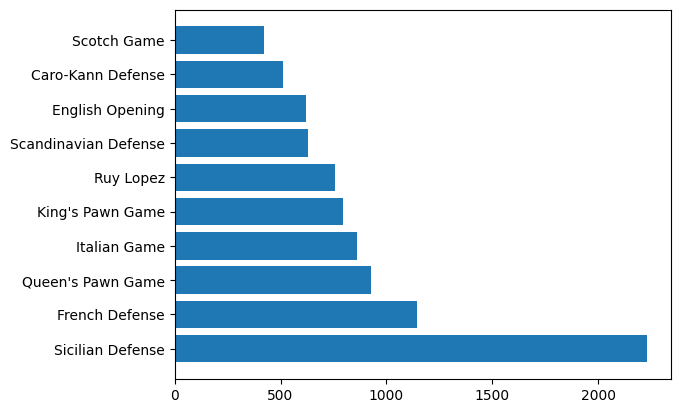

In [64]:
import matplotlib.pyplot as plt
most_played = idf['opening_name'].value_counts().head(10).to_dict()
openings = list(most_played.keys())
count_openings = list(most_played.values())

fig, ax = plt.subplots()

ax.barh(openings, count_openings, align='center')

plt.show()

### The best opening for white and black in the top ten openings: 

#### In the first step, create a data frame with the same number of games in each opening.

In [ ]:
# creating valid data frame
valid_opening = list(idf['opening_name'].value_counts().head(10).keys())
valid_opening_df = idf[idf['opening_name'].isin(valid_opening)].reset_index(drop=True)

# find min game in one opening
min_opening_count = valid_opening_df['opening_name'].value_counts().min()

# creating a data frame where all openings are found at the same rate
equality_df = valid_opening_df.apply(lambda x: x.sample(n=min_opening_count, random_state=42))
# این دیتا فریم الان همه اپنینگ های مناسب رو داره ولی خب تعداد نابرابری دارن


#### And now finding the best opening for white and black:

In [105]:
equality_df.reset_index(drop=True)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,variant
0,True,65,resign,white,8+2,1909,1406,Queen's Pawn Game,Chigorin Variation
1,True,60,resign,black,20+0,1126,1483,French Defense,Queen's Knight
2,True,27,resign,white,15+2,1334,1443,English Opening,The Whale
3,True,17,resign,white,10+0,1467,1372,Ruy Lopez,Classical Variation
4,True,51,resign,white,20+0,1305,1671,Sicilian Defense,Smith-Morra Gambit #2
...,...,...,...,...,...,...,...,...,...
416,True,81,resign,white,10+0,2090,2236,Scandinavian Defense,Main Line
417,True,49,resign,white,10+0,1783,1364,Italian Game,Two Knights Defense | Knight Attack | Norma...
418,True,44,mate,black,8+0,1331,1341,Scandinavian Defense,None
419,True,52,mate,black,10+0,1175,1270,Queen's Pawn Game,Chigorin Variation
